In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("analytics-bloomington.in.gov-pages-20170101-20170518.csv")
df.head()

,Page,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value
0,/,"199,472","105,537",0:00:23,"95,373",13.56%,20.64%,$0.00
1,/animal-shelter/animals,"164,699","35,458",0:00:14,"13,635",0.12%,6.21%,$0.00
2,/animal-shelter,"90,820","33,427",0:00:16,"28,948",0.34%,12.96%,$0.00
3,/departments/hr/jobs,"88,402","27,365",0:00:18,"18,204",1.33%,17.28%,$0.00
4,/utilities/pay-bill,"79,530","34,706",0:00:30,"18,960",1.39%,40.78%,$0.00


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Page               5000 non-null   object
 1   Pageviews          5000 non-null   object
 2   Unique Pageviews   5000 non-null   object
 3   Avg. Time on Page  5000 non-null   object
 4   Entrances          5000 non-null   object
 5   Bounce Rate        5000 non-null   object
 6   % Exit             5000 non-null   object
 7   Page Value         5000 non-null   object
dtypes: object(8)
memory usage: 312.6+ KB


In [51]:
c_df = df.iloc[:,1:].replace(regex='[\,\$\%\:\<]', value='')
c_df = c_df.astype(float)
c_df.head()

,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value
0,199472.0,105537.0,23.0,95373.0,13.56,20.64,0.0
1,164699.0,35458.0,14.0,13635.0,0.12,6.21,0.0
2,90820.0,33427.0,16.0,28948.0,0.34,12.96,0.0
3,88402.0,27365.0,18.0,18204.0,1.33,17.28,0.0
4,79530.0,34706.0,30.0,18960.0,1.39,40.78,0.0


In [61]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pageviews          5000 non-null   float64
 1   Unique Pageviews   5000 non-null   float64
 2   Avg. Time on Page  5000 non-null   float64
 3   Entrances          5000 non-null   float64
 4   Bounce Rate        5000 non-null   float64
 5   % Exit             5000 non-null   float64
 6   Page Value         5000 non-null   float64
dtypes: float64(7)
memory usage: 273.6 KB


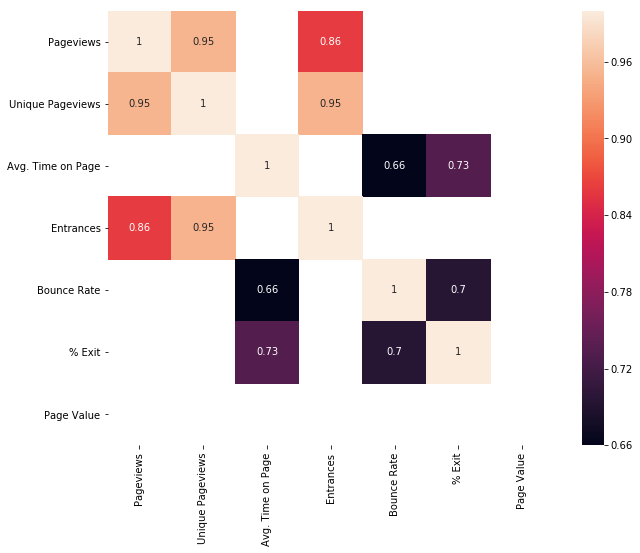

In [63]:
index = c_df.corr()>0.6
plt.figure(figsize=(10,8))
sns.heatmap(c_df.corr()[index], annot=True)
plt.show()

<Figure size 720x576 with 0 Axes>

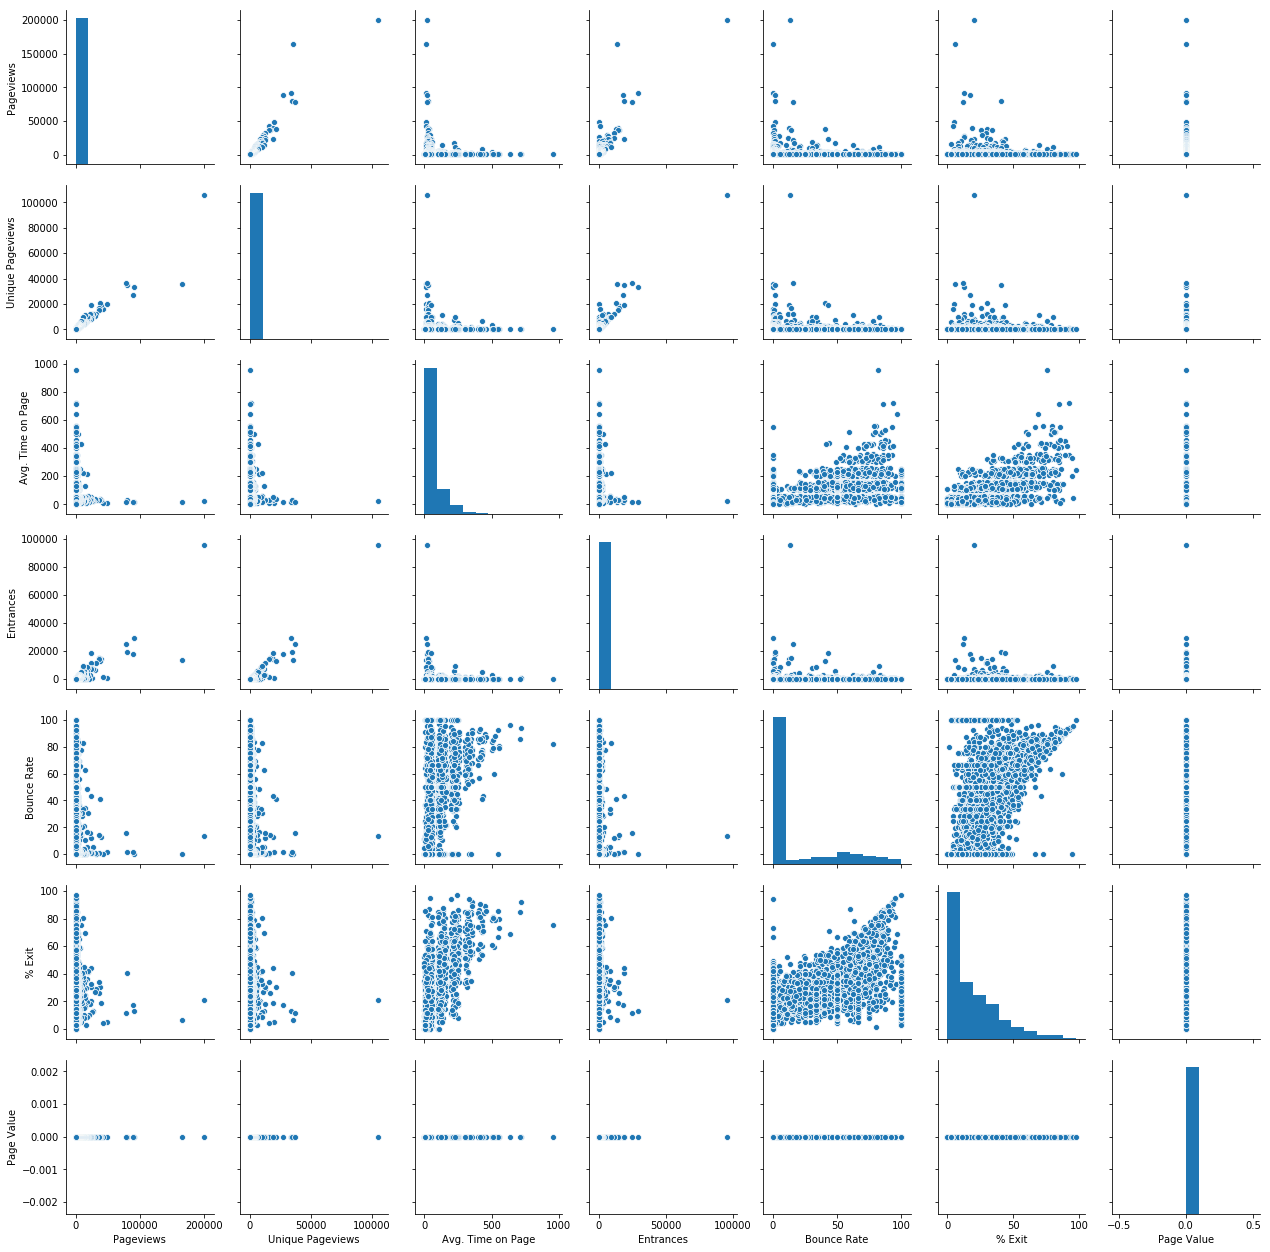

In [64]:
plt.figure(figsize=(10,8))
sns.pairplot(c_df)
plt.show()

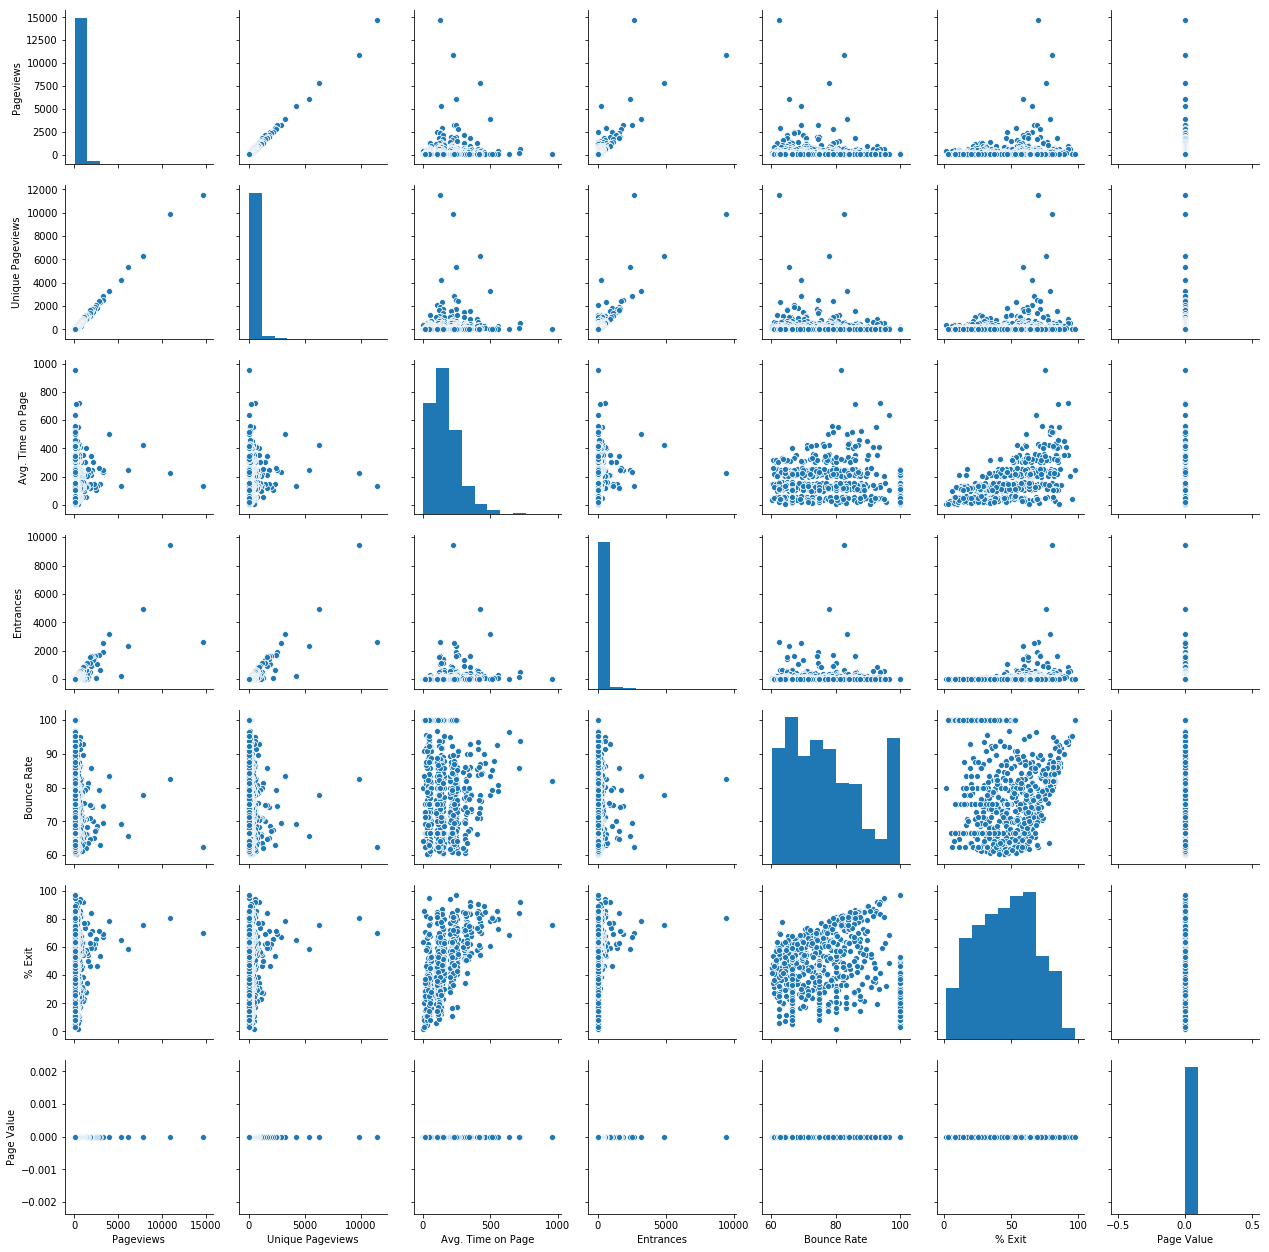

In [70]:
bounce = c_df['Bounce Rate']>60
sns.pairplot(c_df[bounce])